#Challenge 2 TelecomX

La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

## Extracción

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [128]:
url = 'https://raw.githubusercontent.com/Just-Joelz/Analisis-de-Evasion-de-Clientes/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [130]:
df.shape

(7267, 6)

### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

In [131]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Transformación

### DF Normalizado

In [132]:
dfdrop = df.drop(['customer', 'phone', 'internet', 'account'], axis=1)
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

In [133]:
dfn = pd.concat([dfdrop, df_customer, df_phone, df_internet, df_account], axis=1)

In [134]:
dfn

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [135]:
dfn.rename(columns={'Charges.Monthly': 'Charges_Monthly', 'Charges.Total': 'Charges_Total'}, inplace=True)

In [136]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [137]:
for col in dfn.columns:
    print(f"\n Valores únicos en la columna {col}: {dfn[col].nunique()}\n {dfn[col].unique()}")


 Valores únicos en la columna customerID: 7267
 ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

 Valores únicos en la columna Churn: 3
 ['No' 'Yes' '']

 Valores únicos en la columna gender: 2
 ['Female' 'Male']

 Valores únicos en la columna SeniorCitizen: 2
 [0 1]

 Valores únicos en la columna Partner: 2
 ['Yes' 'No']

 Valores únicos en la columna Dependents: 2
 ['Yes' 'No']

 Valores únicos en la columna tenure: 73
 [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

 Valores únicos en la columna PhoneService: 2
 ['Yes' 'No']

 Valores únicos en la columna MultipleLines: 3
 ['No' 'Yes' 'No phone service']

 Valores únicos en la columna InternetService: 3
 ['DSL' 'Fiber optic' 'No']

 Valores únicos en la columna OnlineSecurity: 3
 ['No' 'Yes' 'No internet service']

 Valor

### Datos Nulos

In [138]:
dfn.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


### Datos Duplicados

In [139]:
dfn.duplicated().sum()

np.int64(0)

### Datos Vacios

In [140]:
valores_blanco_o_vacio = dfn.apply(lambda x: x.astype(str).str.strip() == '').sum()
print(f"\nValores en blanco o strings vacios por columna:\n{valores_blanco_o_vacio[valores_blanco_o_vacio > 0]}")


Valores en blanco o strings vacios por columna:
Churn            224
Charges_Total     11
dtype: int64


In [141]:
dfn = dfn.query('Churn != ""').copy()
dfn

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [142]:
valores_blanco_o_vacio = dfn.apply(lambda x: x.astype(str).str.strip() == '').sum()
print(f"\nValores en blanco o strings vacios por columna:\n{valores_blanco_o_vacio[valores_blanco_o_vacio > 0]}")


Valores en blanco o strings vacios por columna:
Charges_Total    11
dtype: int64


In [143]:
dfn = dfn.query('Charges_Total != " "').copy()
dfn

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [144]:
valores_blanco_o_vacio = dfn.apply(lambda x: x.astype(str).str.strip() == '').sum()
print(f"\nValores en blanco o strings vacios por columna:\n{valores_blanco_o_vacio[valores_blanco_o_vacio > 0]}")


Valores en blanco o strings vacios por columna:
Series([], dtype: int64)


### Convirtiendo Tipo de Columnas

In [145]:
dfn['Charges_Monthly'] = dfn['Charges_Monthly'].astype(np.float64)

In [146]:
dfn['Charges_Total'] = dfn['Charges_Total'].astype(np.float64)

### Creando columna

In [147]:
dfn['Cuentas Diarias'] = dfn['Charges_Monthly'] / 30
dfn

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


## Descripción de los archivos

In [148]:
dfn.describe()

,SeniorCitizen,tenure,Charges_Monthly,Charges_Total,Cuentas Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


## Carga y análisis

### Gráficas Estáticas

In [149]:
dfn.Churn.value_counts()

,count
Churn,
No,5163
Yes,1869


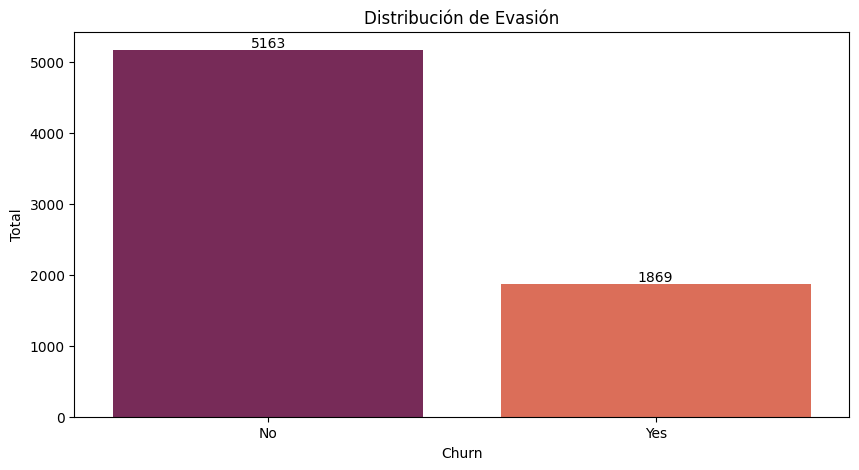

In [150]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='Churn', data=dfn, legend=False, palette='rocket', hue= dfn.Churn)
ax.set_title('Distribución de Evasión')
ax.set_ylabel('Total')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

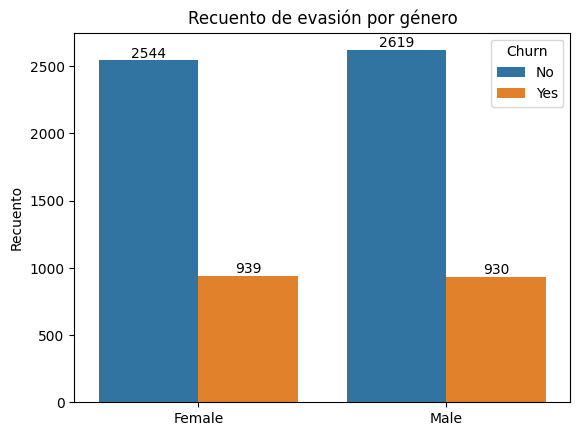

In [151]:
fig, ax = plt.subplots()
ax = sns.countplot(x='gender', hue='Churn', data=dfn, ax=ax)
ax.set_title('Recuento de evasión por género')
ax.set_xlabel('')
ax.set_ylabel('Recuento')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

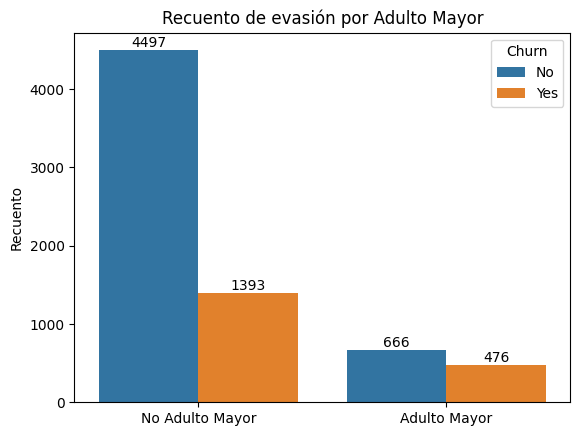

In [152]:
fig, ax = plt.subplots()
ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=dfn, ax=ax)
ax.set_title('Recuento de evasión por Adulto Mayor')
ax.set_xlabel('')
ax.set_ylabel('Recuento')
plt.xticks([0, 1], ['No Adulto Mayor', 'Adulto Mayor'])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

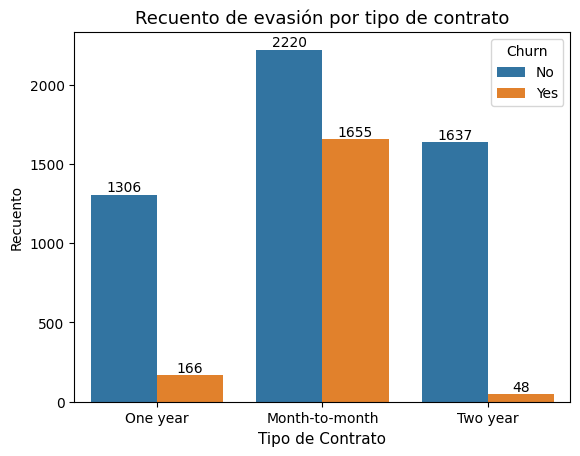

In [153]:
fig, ax = plt.subplots()
ax = sns.countplot(x='Contract', hue='Churn', data=dfn, ax=ax)
ax.set_title('Recuento de evasión por tipo de contrato', fontsize=13)
ax.set_xlabel('Tipo de Contrato', fontsize=11)
ax.set_ylabel('Recuento')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

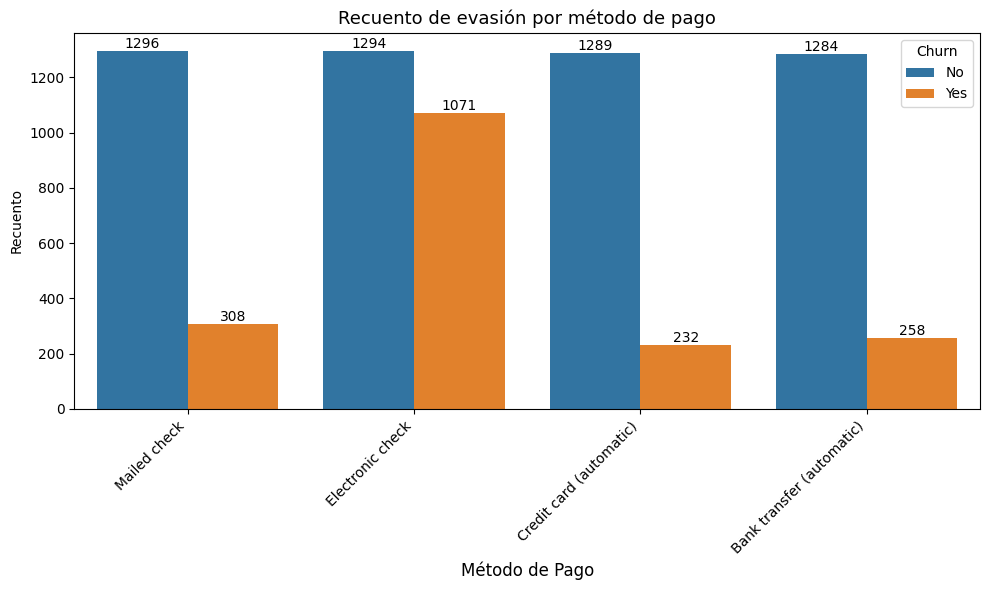

In [154]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='PaymentMethod', hue='Churn', data=dfn, ax=ax)
ax.set_title('Recuento de evasión por método de pago', fontsize=13)
ax.set_xlabel('Método de Pago', fontsize=12)
ax.set_ylabel('Recuento')
plt.xticks(rotation=45, ha='right')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

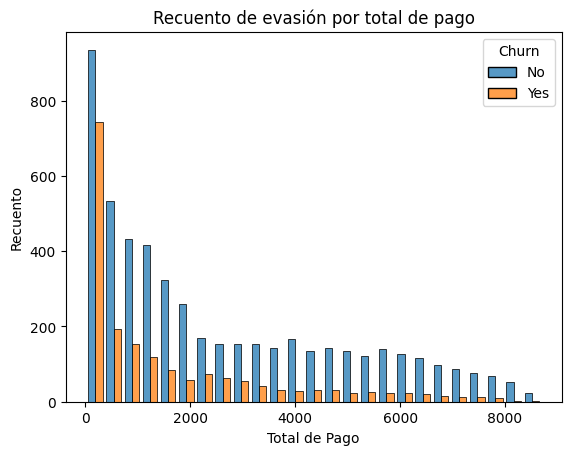

In [155]:
fig, ax = plt.subplots()
sns.histplot(data=dfn, x='Charges_Total', hue='Churn', multiple='dodge', shrink=0.8, ax=ax)
ax.set_title('Recuento de evasión por total de pago')
ax.set_xlabel('Total de Pago')
ax.set_ylabel('Recuento')
plt.show()

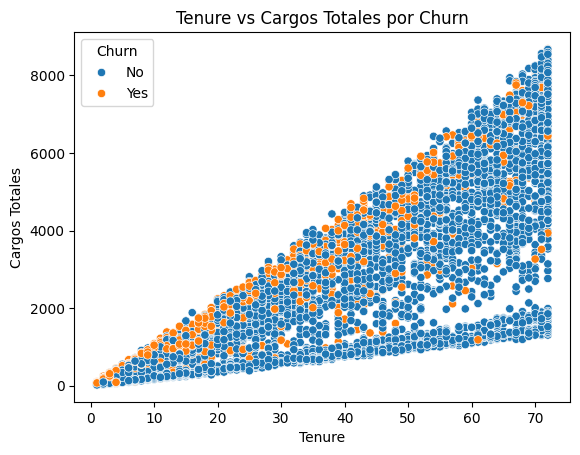

In [156]:
fig, ax = plt.subplots()
sns.scatterplot(data=dfn, x="tenure", y="Charges_Total", hue="Churn", ax=ax)
ax.set_title("Tenure vs Cargos Totales por Churn")
ax.set_xlabel("Tenure")
ax.set_ylabel("Cargos Totales")
plt.show()

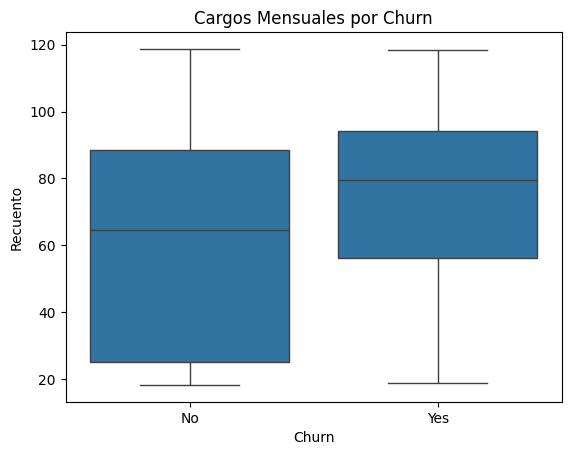

In [157]:
fig, ax = plt.subplots()
sns.boxplot(data=dfn, x='Churn', y='Charges_Monthly', ax=ax)
ax.set_title('Cargos Mensuales por Churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Recuento')
plt.show()

### Gráficas Interactivas

In [158]:
figure = px.histogram(dfn, x='Churn', title='Distribución de Evasión', text_auto=True, color='Churn')
figure.update_layout(yaxis_title='Total')
figure.show()

In [159]:
figure1 = px.histogram(dfn, x='gender', color='Churn', title='Recuento de evasión por género', barmode='group', text_auto=True)
figure1.update_layout(yaxis_title='Recuento', xaxis_title = '')
figure1.show()

In [160]:
figure2 = px.histogram(dfn, x='SeniorCitizen', color='Churn', title='Recuento de evasión por Adulto Mayor', barmode='group', text_auto=True)
figure2.update_layout(yaxis_title='Recuento', xaxis = {'tickvals': [0, 1], 'ticktext': ['No Adulto Mayor', 'Adulto Mayor']}, xaxis_title = '')
figure2.show()

In [161]:
figure3 = px.histogram(dfn, x='Contract', color='Churn', title='Recuento de evasión por tipo de contrato', barmode='group', text_auto=True)
figure3.update_layout(yaxis_title='Recuento', xaxis_title = 'Tipo de Contrato')
figure3.show()

In [162]:
figure4 = px.histogram(dfn, x='PaymentMethod', color='Churn', title='Recuento de evasión por método de pago', barmode='group', text_auto=True)
figure4.update_layout(yaxis_title='Recuento', xaxis_title = 'Método de Pago')
figure4.show()

In [163]:
figure5 = px.histogram(dfn, x='Charges_Total', color='Churn', title='Recuento de evasión por total de pago', barmode='group', text_auto=True)
figure5.update_layout(yaxis_title='Recuento', xaxis_title = '')
figure5.show()

In [164]:
figure6 = px.scatter(dfn, x="tenure", y="Charges_Total",color="Churn", title="Tenure vs Cargos Totales por Churn")
figure6.update_layout(yaxis_title='Recuento', xaxis_title = 'Tenure')
figure6.show()

In [165]:
figure7 = px.box(dfn, x = 'Churn', y = 'Charges_Monthly', color = 'Churn')
figure7.update_layout(yaxis_title='Recuento', xaxis_title = '')
figure7.show()

#### Cálculo Tasa de Churn

In [166]:
dfn_grouped = dfn.groupby(['tenure', 'Churn']).size().unstack()
dfn_grouped['churn_rate'] = (dfn_grouped['Yes'] / dfn_grouped.sum(axis=1)) * 100

In [167]:
dfn_grouped

Churn,No,Yes,churn_rate
tenure,,,
1,233,380,61.990212
2,115,123,51.680672
3,106,94,47.000000
4,93,83,47.159091
5,69,64,48.120301
...,...,...,...
68,91,9,9.000000
69,87,8,8.421053
70,108,11,9.243697


In [168]:
figure = px.line(dfn_grouped.reset_index(),
                 x='tenure',
                 y='churn_rate',
                 markers=True,
                 title='Tasa de Churn (%) por Tenure')
figure.update_layout(xaxis_title='Tenure', yaxis_title='Tasa de Churn (%)')
figure.show()

## Informe Final: Análisis de Evasión de Clientes (Churn) para TelecomX

### Introducción:

El objetivo de este análisis es comprender los factores que contribuyen a la alta tasa de cancelación de clientes (Churn) en TelecomX. La evasión de clientes representa una pérdida significativa de ingresos y recursos, por lo que identificar las causas subyacentes es crucial para desarrollar estrategias de retención efectivas. Este informe detalla el proceso de recopilación, limpieza, procesamiento y análisis exploratorio de los datos de clientes para obtener información valiosa que ayude a reducir la evasión.

### Limpieza y Tratamiento de Datos:

El análisis comenzó con la importación de los datos desde un archivo JSON alojado en GitHub. El conjunto de datos inicial contenía información anidada en varias columnas (`customer`, `phone`, `internet`, `account`). Para facilitar el análisis, se normalizaron estas columnas, extrayendo la información relevante en columnas separadas. Las columnas originales con datos anidados (`customer`, `phone`, `internet`, `account`) se eliminaron del DataFrame principal  (`dfdrop`) y después se concatenaron todos los DataFrame secundarios(`customer`, `phone`, `internet`, `account`) con el DataFrame principal(`dfdrop`) para obtener un DataFrame normalizado (`dfn`).

Se realizó una verificación de valores nulos y duplicados, confirmando que no había valores nulos ni filas duplicadas en el DataFrame normalizado (`dfn`). Sin embargo, se identificaron valores vacíos (strings en blanco) en las columnas `Churn` y `Charges_Total`. Estos valores se eliminaron para asegurar la calidad de los datos para el análisis.

Finalmente, se renombraron las columnas `Charges.Monthly` y `Charges.Total` a `Charges_Monthly` y `Charges_Total` respectivamente para una mejor legibilidad y uso correcto del lenguaje de programación y se convirtieron a tipo numérico (`float64`). También se creó una nueva columna llamada `Cuentas Diarias` calculando el cargo diario promedio a partir de `Charges_Monthly`.

### Análisis Exploratorio de Datos:

Se realizaron varios análisis exploratorios utilizando visualizaciones para identificar patrones y relaciones en los datos:

*   **Distribución de Churn:** Se visualizó la distribución de clientes que evadieron y los que no evadieron, mostrando que la mayoría de los clientes no han evadido.
*   **Recuento de Evasión por Género:** Se analizó la tasa de evasión en función del género, revelando que no hay una diferencia significativa en la tasa de evasión entre hombres y mujeres.
*   **Recuento de Evasión por Adulto Mayor:** Se examinó la evasión en relación con la edad, indicando que los adultos mayores tienen una tasa de evasión ligeramente más alta que los no adultos mayores.
*   **Recuento de Evasión por Tipo de Contrato:** Se visualizó la evasión según el tipo de contrato, mostrando que los clientes con contratos mes a mes (`Month-to-month`) tienen una tasa de evasión considerablemente mayor en comparación con aquellos con contratos de un año (`One year`) o dos años (`Two year`).
*   **Recuento de Evasión por Método de Pago:** Se analizó la evasión por método de pago, destacando que la evasión es más alta entre los clientes que utilizan el pago electrónico (`Electronic check`).
*   **Recuento de Evasión por Total de Pago:** Se visualizó la distribución de evasión en función del total de cargos, sugiriendo que los clientes con cargos totales más bajos tienen una mayor propensión a evadir.
*   **Tenure vs Cargos Totales por Churn:** Se exploró la relación entre la antigüedad del cliente (tenure) y los cargos totales en relación con la evasión, mostrando que los clientes con menor antigüedad tienden a tener cargos totales más bajos y una mayor tasa de evasión.
*   **Cargos Mensuales por Churn:** Se analizó la distribución de cargos mensuales para clientes que evadieron y no evadieron, indicando que los clientes que evadieron generalmente tienen cargos mensuales más altos.
*   **Tasa de Churn (%) por Tenure:** Se calculó y visualizó la tasa de evasión en función de la antigüedad del cliente (tenure), confirmando que la tasa de evasión es significativamente más alta en los primeros meses y disminuye a medida que aumenta la antigüedad del cliente.

### Conclusiones e Insights:

Los hallazgos clave de este análisis incluyen:

*   Los clientes con contratos mes a mes y aquellos que utilizan el pago electrónico tienen una mayor probabilidad de evadir.
*   Los clientes con menor antigüedad (tenure) presentan una tasa de evasión considerablemente más alta.
*   Los clientes que evaden tienden a tener cargos mensuales más altos.
*   La edad (ser adulto mayor) parece tener un impacto leve en la tasa de evasión.
*   El género no parece ser un factor determinante en la evasión.

Estos insights sugieren que la flexibilidad del contrato, el método de pago, la antigüedad y los cargos mensuales son factores importantes a considerar en la predicción y mitigación de la evasión.

### Recomendaciones:

Basado en este análisis, se proponen las siguientes recomendaciones estratégicas para reducir la evasión:

*   **Ofrecer incentivos para contratos a largo plazo:** Fomentar que los clientes opten por contratos de un año o dos años podría reducir la tasa de evasión, ya que los clientes con contratos más largos tienen una menor propensión a irse.
*   **Promover métodos de pago alternativos al cheque electrónico:** Considerar la implementación de incentivos o campañas para migrar a los clientes que utilizan el cheque electrónico a otros métodos de pago con menor tasa de evasión.
*   **Implementar programas de retención temprana:** Enfocarse en los clientes con menor antigüedad (en los primeros meses) con ofertas especiales, mejor soporte o comunicación proactiva para reducir la alta tasa de evasión en esta cohorte.
*   **Analizar la estructura de cargos mensuales:** Investigar si los cargos mensuales más altos para los clientes que evaden están relacionados con servicios específicos o paquetes, y considerar ajustar las ofertas o brindar opciones más flexibles.
*   **Segmentar a los clientes y personalizar las estrategias de retención:** Utilizar los insights de este análisis para segmentar a los clientes en riesgo (por ejemplo, mes a mes, pago electrónico, baja antigüedad) y adaptar las estrategias de retención a sus necesidades y preferencias.